In [117]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

import pandas as pd

In [118]:
df = pd.read_csv('AIerror_ONU16_15S_Cycle&Ai.csv')
df.head()

,Cycle,Ai
0,9200,472
1,9201,906
2,9202,472
3,9203,906
4,9204,472


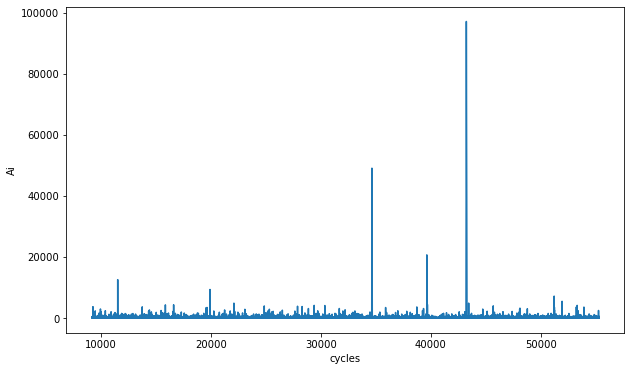

In [119]:
#df.plot()
plt.figure(figsize=(10, 6))
plt.xlabel('cycles')
plt.ylabel('Ai')

#plt.plot(df['Cycle'], label='Ai')
#plt.plot(df['Ai'], label='Ai')
x = df['Cycle']
y = df['Ai'].div(100)

#plt.semilogy()
plt.plot(x, y)

In [120]:
#建立訓練與測試資料
def createData(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

dataset = df.values
#dataset = df['Ai'].values
#dataset = dataset.astype('int')
dataset = dataset.astype('float32')

'''
data = []
data_size = len(dataset)

for i in dataset:
    data.append(i)
    
indices = np.array()
data = np.array(data)[indices.astype(int)]
data = np.reshape(data, (data, 1))
'''

'\ndata = []\ndata_size = len(dataset)\n\nfor i in dataset:\n    data.append(i)\n    \nindices = np.array()\ndata = np.array(data)[indices.astype(int)]\ndata = np.reshape(data, (data, 1))\n'

In [121]:
#X 常態化
scaler = MinMaxScaler(feature_range = (0, 1)) #-1, 1
dataset = scaler.fit_transform(dataset)

In [122]:
#分割訓練與測試資料
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [123]:
#前期資料 = X, 當期資料 = Y
look_back = 10
trainX, trainY = createData(train, look_back)
testX, testY = createData(test, look_back)

In [124]:
#將資料轉換成三維以供LSTM訓練使用
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [125]:
model = Sequential()

model.add(LSTM(40, input_shape = (1, look_back)))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse','mae'])
history = model.fit(trainX, trainY, epochs=50, batch_size=32,  verbose=1, validation_split=0.3)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/50
706/706 [==============================] - 2s 3ms/step - loss: 0.0107 - mse: 0.0022 - mae: 0.0107 - val_loss: 0.0078 - val_mse: 7.4523e-05 - val_mae: 0.0078
Epoch 2/50
706/706 [==============================] - 2s 2ms/step - loss: 6.0428e-04 - mse: 6.4028e-07 - mae: 6.0428e-04 - val_loss: 0.0082 - val_mse: 7.8859e-05 - val_mae: 0.0082
Epoch 3/50
706/706 [==============================] - 2s 2ms/step - loss: 7.5614e-04 - mse: 1.0363e-06 - mae: 7.5614e-04 - val_loss: 0.0033 - val_mse: 1.8113e-05 - val_mae: 0.0033
Epoch 4/50
706/706 [==============================] - 2s 2ms/step - loss: 7.5192e-04 - mse: 1.0310e-06 - mae: 7.5192e-04 - val_loss: 0.0031 - val_mse: 1.6108e-05 - val_mae: 0.0031
Epoch 5/50
706/706 [==============================] - 2s 2ms/step - loss: 6.1549e-04 - mse: 6.5552e-07 - mae: 6.1549e-04 - val_loss: 0.0045 - val_mse: 2.6843e-05 - val_mae: 0.0045
Epoch 6/50
706/706 [==============================] - 2s 2ms/step - loss: 8.1929e-04 - mse: 1.3602e-06 - mae: 8.

Epoch 46/50
706/706 [==============================] - 2s 2ms/step - loss: 6.7897e-04 - mse: 8.2226e-07 - mae: 6.7897e-04 - val_loss: 0.0010 - val_mse: 1.7943e-06 - val_mae: 0.0010
Epoch 47/50
706/706 [==============================] - 2s 2ms/step - loss: 6.8261e-04 - mse: 7.8716e-07 - mae: 6.8261e-04 - val_loss: 0.0037 - val_mse: 1.6246e-05 - val_mae: 0.0037
Epoch 48/50
706/706 [==============================] - 2s 2ms/step - loss: 8.9432e-04 - mse: 1.4771e-06 - mae: 8.9432e-04 - val_loss: 0.0034 - val_mse: 1.4665e-05 - val_mae: 0.0034
Epoch 49/50
706/706 [==============================] - 2s 2ms/step - loss: 6.4398e-04 - mse: 7.5519e-07 - mae: 6.4398e-04 - val_loss: 0.0014 - val_mse: 2.3240e-06 - val_mae: 0.0014
Epoch 50/50
706/706 [==============================] - 2s 2ms/step - loss: 5.9444e-04 - mse: 6.8752e-07 - mae: 5.9444e-04 - val_loss: 0.0026 - val_mse: 9.1711e-06 - val_mae: 0.0026


In [126]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 40)                8160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 41        
Total params: 8,201
Trainable params: 8,201
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'mae')

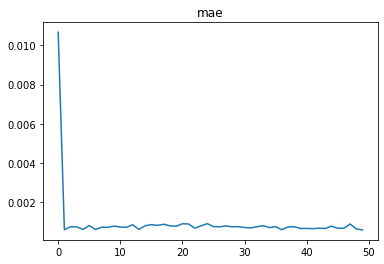

In [127]:
plt.plot(history.history['mae'])
plt.title('mae')

Text(0.5, 1.0, 'mse')

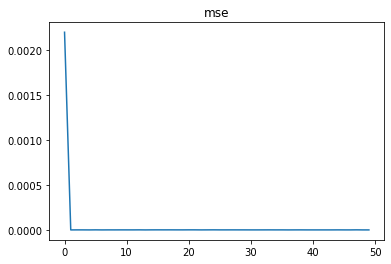

In [128]:
plt.plot(history.history['mse'])
plt.title('mse')

In [129]:
from sklearn.metrics import mean_squared_error as mse

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

MSE_TrainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('MSE train score : %.2f RMSE' %  (MSE_TrainScore))
MSE_TestScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('MSE test score : %.2f RMSE' %  (MSE_TestScore))
MAE_TrainScore = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('MAE train score : %.2f RMAE' %  (MAE_TrainScore))
MAE_TestScore = math.sqrt(mae(testY[0], testPredict[:,0]))
print('MAE test score : %.2f RMAE' %  (MAE_TestScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + lookback, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1: len(dataset) - 1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: non-broadcastable output operand with shape (32236,1) doesn't match the broadcast shape (32236,2)